# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=5837ed2d08db46291cf01cd24e38a821&units=metric&q=


In [4]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
city_id = []

# Loop thru the list of cities and perform a request for data on each
x = 0
for city in cities:
    
    x = x+1 #This is with Sri's help
    
    try:
        response = requests.get(query_url + city).json()
   
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_id.append(response['id'])
       
    except KeyError:        
        print(f"{x}. {city} NOT FOUND. Skip.")

14. illoqqortoormiut NOT FOUND. Skip.
36. vaitupu NOT FOUND. Skip.
41. taolanaro NOT FOUND. Skip.
55. amderma NOT FOUND. Skip.
90. dolbeau NOT FOUND. Skip.
109. belushya guba NOT FOUND. Skip.
114. tsihombe NOT FOUND. Skip.
123. nizhneyansk NOT FOUND. Skip.
173. burica NOT FOUND. Skip.
178. yuzhno-yeniseyskiy NOT FOUND. Skip.
210. samusu NOT FOUND. Skip.
215. skalistyy NOT FOUND. Skip.
250. mys shmidta NOT FOUND. Skip.
263. sentyabrskiy NOT FOUND. Skip.
265. lolua NOT FOUND. Skip.
266. safwah NOT FOUND. Skip.
283. skiros NOT FOUND. Skip.
299. tuggurt NOT FOUND. Skip.
305. barawe NOT FOUND. Skip.
315. dieppe bay NOT FOUND. Skip.
331. paradwip NOT FOUND. Skip.
350. tumannyy NOT FOUND. Skip.
361. zhanatas NOT FOUND. Skip.
394. haibowan NOT FOUND. Skip.
397. umzimvubu NOT FOUND. Skip.
402. barentsburg NOT FOUND. Skip.
407. sahrak NOT FOUND. Skip.
421. marcona NOT FOUND. Skip.
427. attawapiskat NOT FOUND. Skip.
442. chagda NOT FOUND. Skip.
444. ondorhaan NOT FOUND. Skip.
446. mutsamudu NOT F

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({
                        "City" : city,
                        "City ID" : city_id,
                        "Latitude" : lat,
                        "Longtitude" : lng,
                        "Temperature(°C)" : temp,
                        "Humidity(%)" : humid,
                        "Cloudiness(%)" : cloud,
                        "Wind Speed (mph)" : wind
                        })
city_data.head()

,City,City ID,Latitude,Longtitude,Temperature(°C),Humidity(%),Cloudiness(%),Wind Speed (mph)
0,jilib,1819729,22.29,114.16,27.94,74,46,4.47
1,jilib,2110227,3.07,172.79,28.48,73,100,2.84
2,jilib,3833367,-54.80,-68.30,4.00,86,90,6.70
3,jilib,1513990,40.13,63.45,33.55,19,0,3.98
4,jilib,6185377,62.46,-114.35,5.02,60,20,5.10


In [6]:
# Export the City_Data into a csv
city_data.to_csv('../city_data.csv', index=False)

In [7]:
# Get the indices of cities that have humidity over 100%.
highHumidCity = city_data.loc[city_data['Humidity(%)'] > 100, ['City', 'City ID']]
highHumidCity

,City,City ID


In [8]:
######## THERE ARE NO CITIES WHERE HUMIDITY IS HIGHER THAN 100%
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [9]:
# Extract relevant fields from the data frame

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature(°C)')

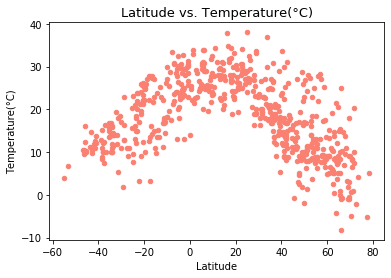

In [10]:
ax1 = city_data.plot.scatter('Latitude', 'Temperature(°C)', color='salmon')
ax1.set_title('Latitude vs. Temperature(°C)', fontsize=13)

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity (%)')

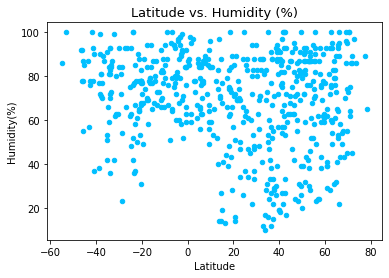

In [11]:
ax2 = city_data.plot.scatter('Latitude', 'Humidity(%)', color='deepskyblue')
ax2.set_title('Latitude vs. Humidity (%)', fontsize=13)

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness(%)')

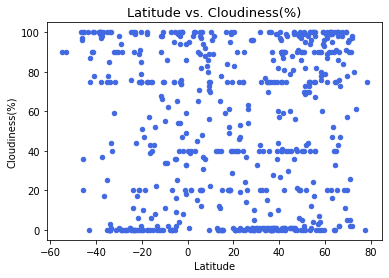

In [12]:
ax3 = city_data.plot.scatter('Latitude', 'Cloudiness(%)', color='royalblue')
ax3.set_title('Latitude vs. Cloudiness(%)', fontsize=13)

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed (mph)')

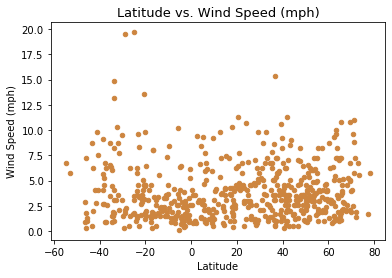

In [13]:
ax4 = city_data.plot.scatter('Latitude', 'Wind Speed (mph)', color='peru')
ax4.set_title('Latitude vs. Wind Speed (mph)', fontsize=13)

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
NHem_df = city_data.loc[city_data['Latitude'] >= 0, :]
SHem_df = city_data.loc[city_data['Latitude'] < 0, :]
NHem_df.head(2)

,City,City ID,Latitude,Longtitude,Temperature(°C),Humidity(%),Cloudiness(%),Wind Speed (mph)
0,jilib,1819729,22.29,114.16,27.94,74,46,4.47
1,jilib,2110227,3.07,172.79,28.48,73,100,2.84


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
from scipy import stats

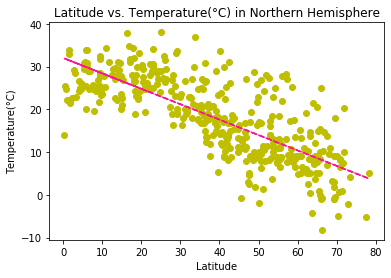

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a scatter plot of Lat. vs Temp. in N-Hem
NLat = NHem_df['Latitude']
NTemp = NHem_df['Temperature(°C)']

plt.scatter(NLat, NTemp, color='y')
plt.xlabel('Latitude')
plt.ylabel('Temperature(°C)')
plt.title('Latitude vs. Temperature(°C) in Northern Hemisphere', fontsize=12)

# Perform a linear regression 
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(NLat, NTemp)
# Create equation of line to calculate predicted Temp.
t_y = (t_slope * NLat) + t_int

plt.plot(NLat, t_y, '--', color='deeppink')

plt.show()

plt.savefig('N_lat_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

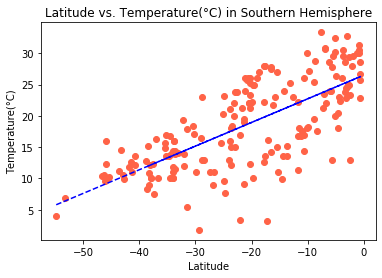

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a scatter plot of Lat. vs Temp. in S-Hem
SLat = SHem_df['Latitude']
STemp = SHem_df['Temperature(°C)']

plt.scatter(SLat,STemp,color='tomato')
plt.xlabel('Latitude')
plt.ylabel('Temperature(°C)')
plt.title('Latitude vs. Temperature(°C) in Southern Hemisphere', fontsize=12)

# Perform a linear regression 
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(SLat, STemp)
# Create equation of line to calculate predicted Temp.
t_y = (t_slope * SLat) + t_int

plt.plot(SLat, t_y, '--', color='b')

plt.show()

plt.savefig('S_lat_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

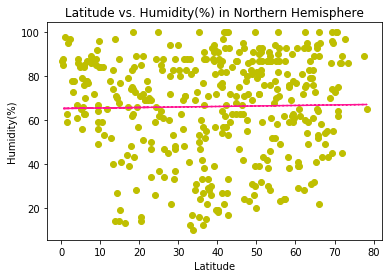

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a scatter plot of Lat. vs Humid. in N-Hem
NLat = NHem_df['Latitude']
NHumid = NHem_df['Humidity(%)']

plt.scatter(NLat, NHumid, color='y')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude vs. Humidity(%) in Northern Hemisphere', fontsize=12)

# Perform a linear regression 
h_slope, h_int, h_r, h_p, h_std_err = stats.linregress(NLat, NHumid)
# Create equation of line to calculate predicted Humid.
h_y = (h_slope * NLat) + h_int

plt.plot(NLat, h_y, '--', color='deeppink')

plt.show()

plt.savefig('N_lat_humid.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

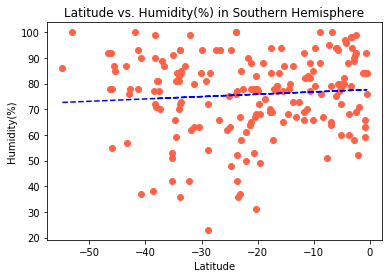

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a scatter plot of Lat. vs Humid. in S-Hem
SLat = SHem_df['Latitude']
SHumid = SHem_df['Humidity(%)']

plt.scatter(SLat,SHumid,color='tomato')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude vs. Humidity(%) in Southern Hemisphere', fontsize=12)

# Perform a linear regression 
h_slope, h_int, h_r, h_p, h_std_err = stats.linregress(SLat, SHumid)
# Create equation of line to calculate predicted Humid.
h_y = (h_slope * SLat) + h_int

plt.plot(SLat, h_y, '--', color='b')

plt.show()

plt.savefig('S_lat_humid.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

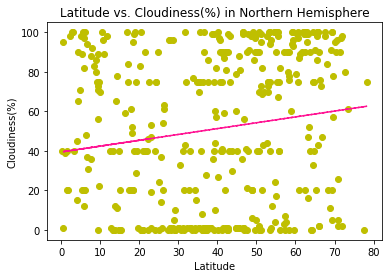

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a scatter plot of Lat. vs Cloud. in N-Hem
NLat = NHem_df['Latitude']
NCloud = NHem_df['Cloudiness(%)']

plt.scatter(NLat, NCloud, color='y')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs. Cloudiness(%) in Northern Hemisphere', fontsize=12)

# Perform a linear regression 
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(NLat, NCloud)
# Create equation of line to calculate predicted Humid.
c_y = (c_slope * NLat) + c_int

plt.plot(NLat, c_y, '--', color='deeppink')

plt.show()

plt.savefig('N_lat_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

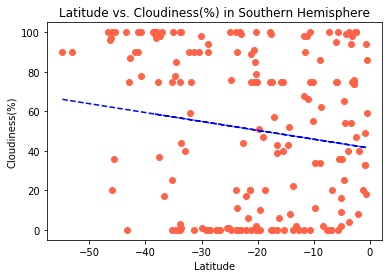

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a scatter plot of Lat. vs Cloud. in S-Hem
SLat = SHem_df['Latitude']
SCloud = SHem_df['Cloudiness(%)']

plt.scatter(SLat,SCloud,color='tomato')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs. Cloudiness(%) in Southern Hemisphere', fontsize=12)

# Perform a linear regression 
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(SLat, SCloud)
# Create equation of line to calculate predicted Cloud.
c_y = (c_slope * SLat) + c_int

plt.plot(SLat, c_y, '--', color='b')

plt.show()

plt.savefig('S_lat_cloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

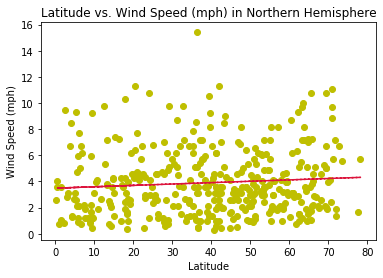

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a scatter plot of Lat. vs Wind. in N-Hem
NLat = NHem_df['Latitude']
NWind = NHem_df['Wind Speed (mph)']

plt.scatter(NLat, NWind, color='y')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) in Northern Hemisphere', fontsize=12)

# Perform a linear regression 
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(NLat, NWind)
# Create equation of line to calculate predicted Wind.
w_y = (w_slope * NLat) + w_int

plt.plot(NLat, w_y, '--', color='crimson')

plt.show()

plt.savefig('N_lat_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

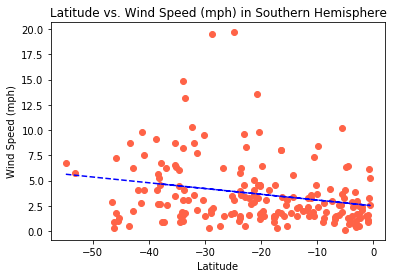

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a scatter plot of Lat. vs Wind. in S-Hem
SLat = SHem_df['Latitude']
SWind = SHem_df['Wind Speed (mph)']

plt.scatter(SLat, SWind, color='tomato')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) in Southern Hemisphere', fontsize=12)

# Perform a linear regression 
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(SLat, SWind)
# Create equation of line to calculate predicted Wind.
w_y = (w_slope * SLat) + w_int

plt.plot(SLat, w_y, '--', color='b')

plt.show()

plt.savefig('S_lat_wind.png')